# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [48]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [49]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import tensorflow as tf
# TODO: Number of training examples
n_train = X_train.shape[0]
# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [50]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [51]:
## Checking the shape of the train image
X_train.shape
temp = X_train[0]

(32, 32, 3)

## Looking at the dataset


In [52]:
ls = []
Plotx = []
for img,y in zip(X_train,y_train):

    if y not in ls:
        Plotx.append((img,y))
        ls.append(y)
    if len(ls) == 43:
        break


In [53]:
import pandas as pd
meta_classes = pd.read_csv("signnames.csv")
meta_classes.head()


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


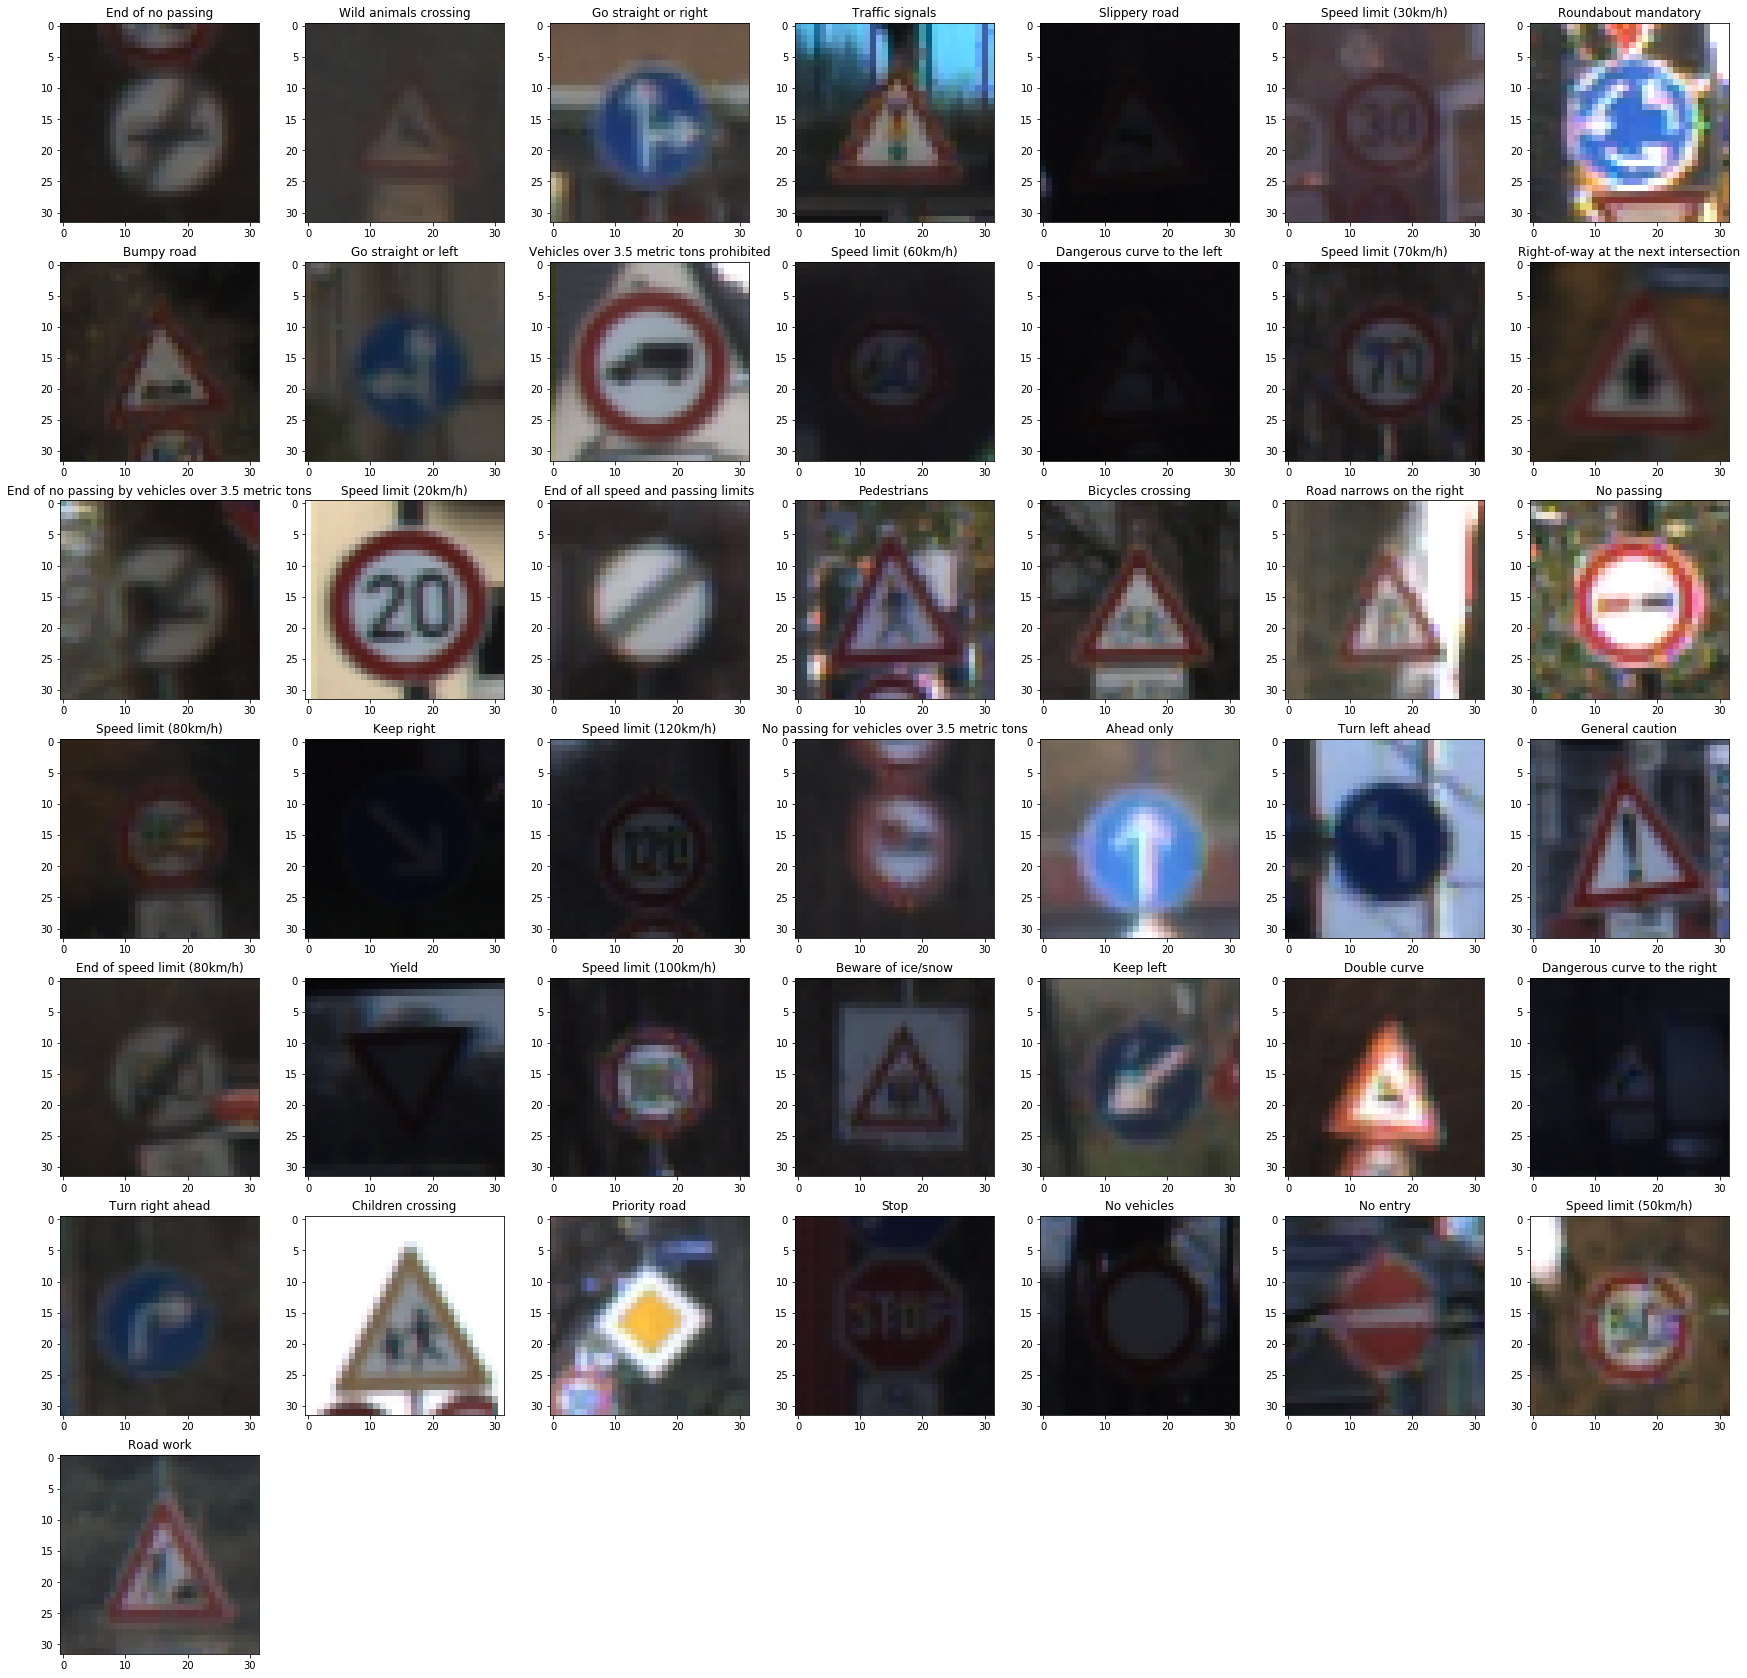

In [45]:
i = 0
f = plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 10})
for img,label in Plotx:
    i+=1
#     plt.subplot(7,7,i+1)
    ax = f.add_subplot(7,7,i)
    ax.imshow(img)
    title = meta_classes[meta_classes["ClassId"]==label][["SignName"]].iloc[0,0]
    ax.title = plt.title(title,)
    plt.savefig('readmeFig/allclasses.jpg')
    

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


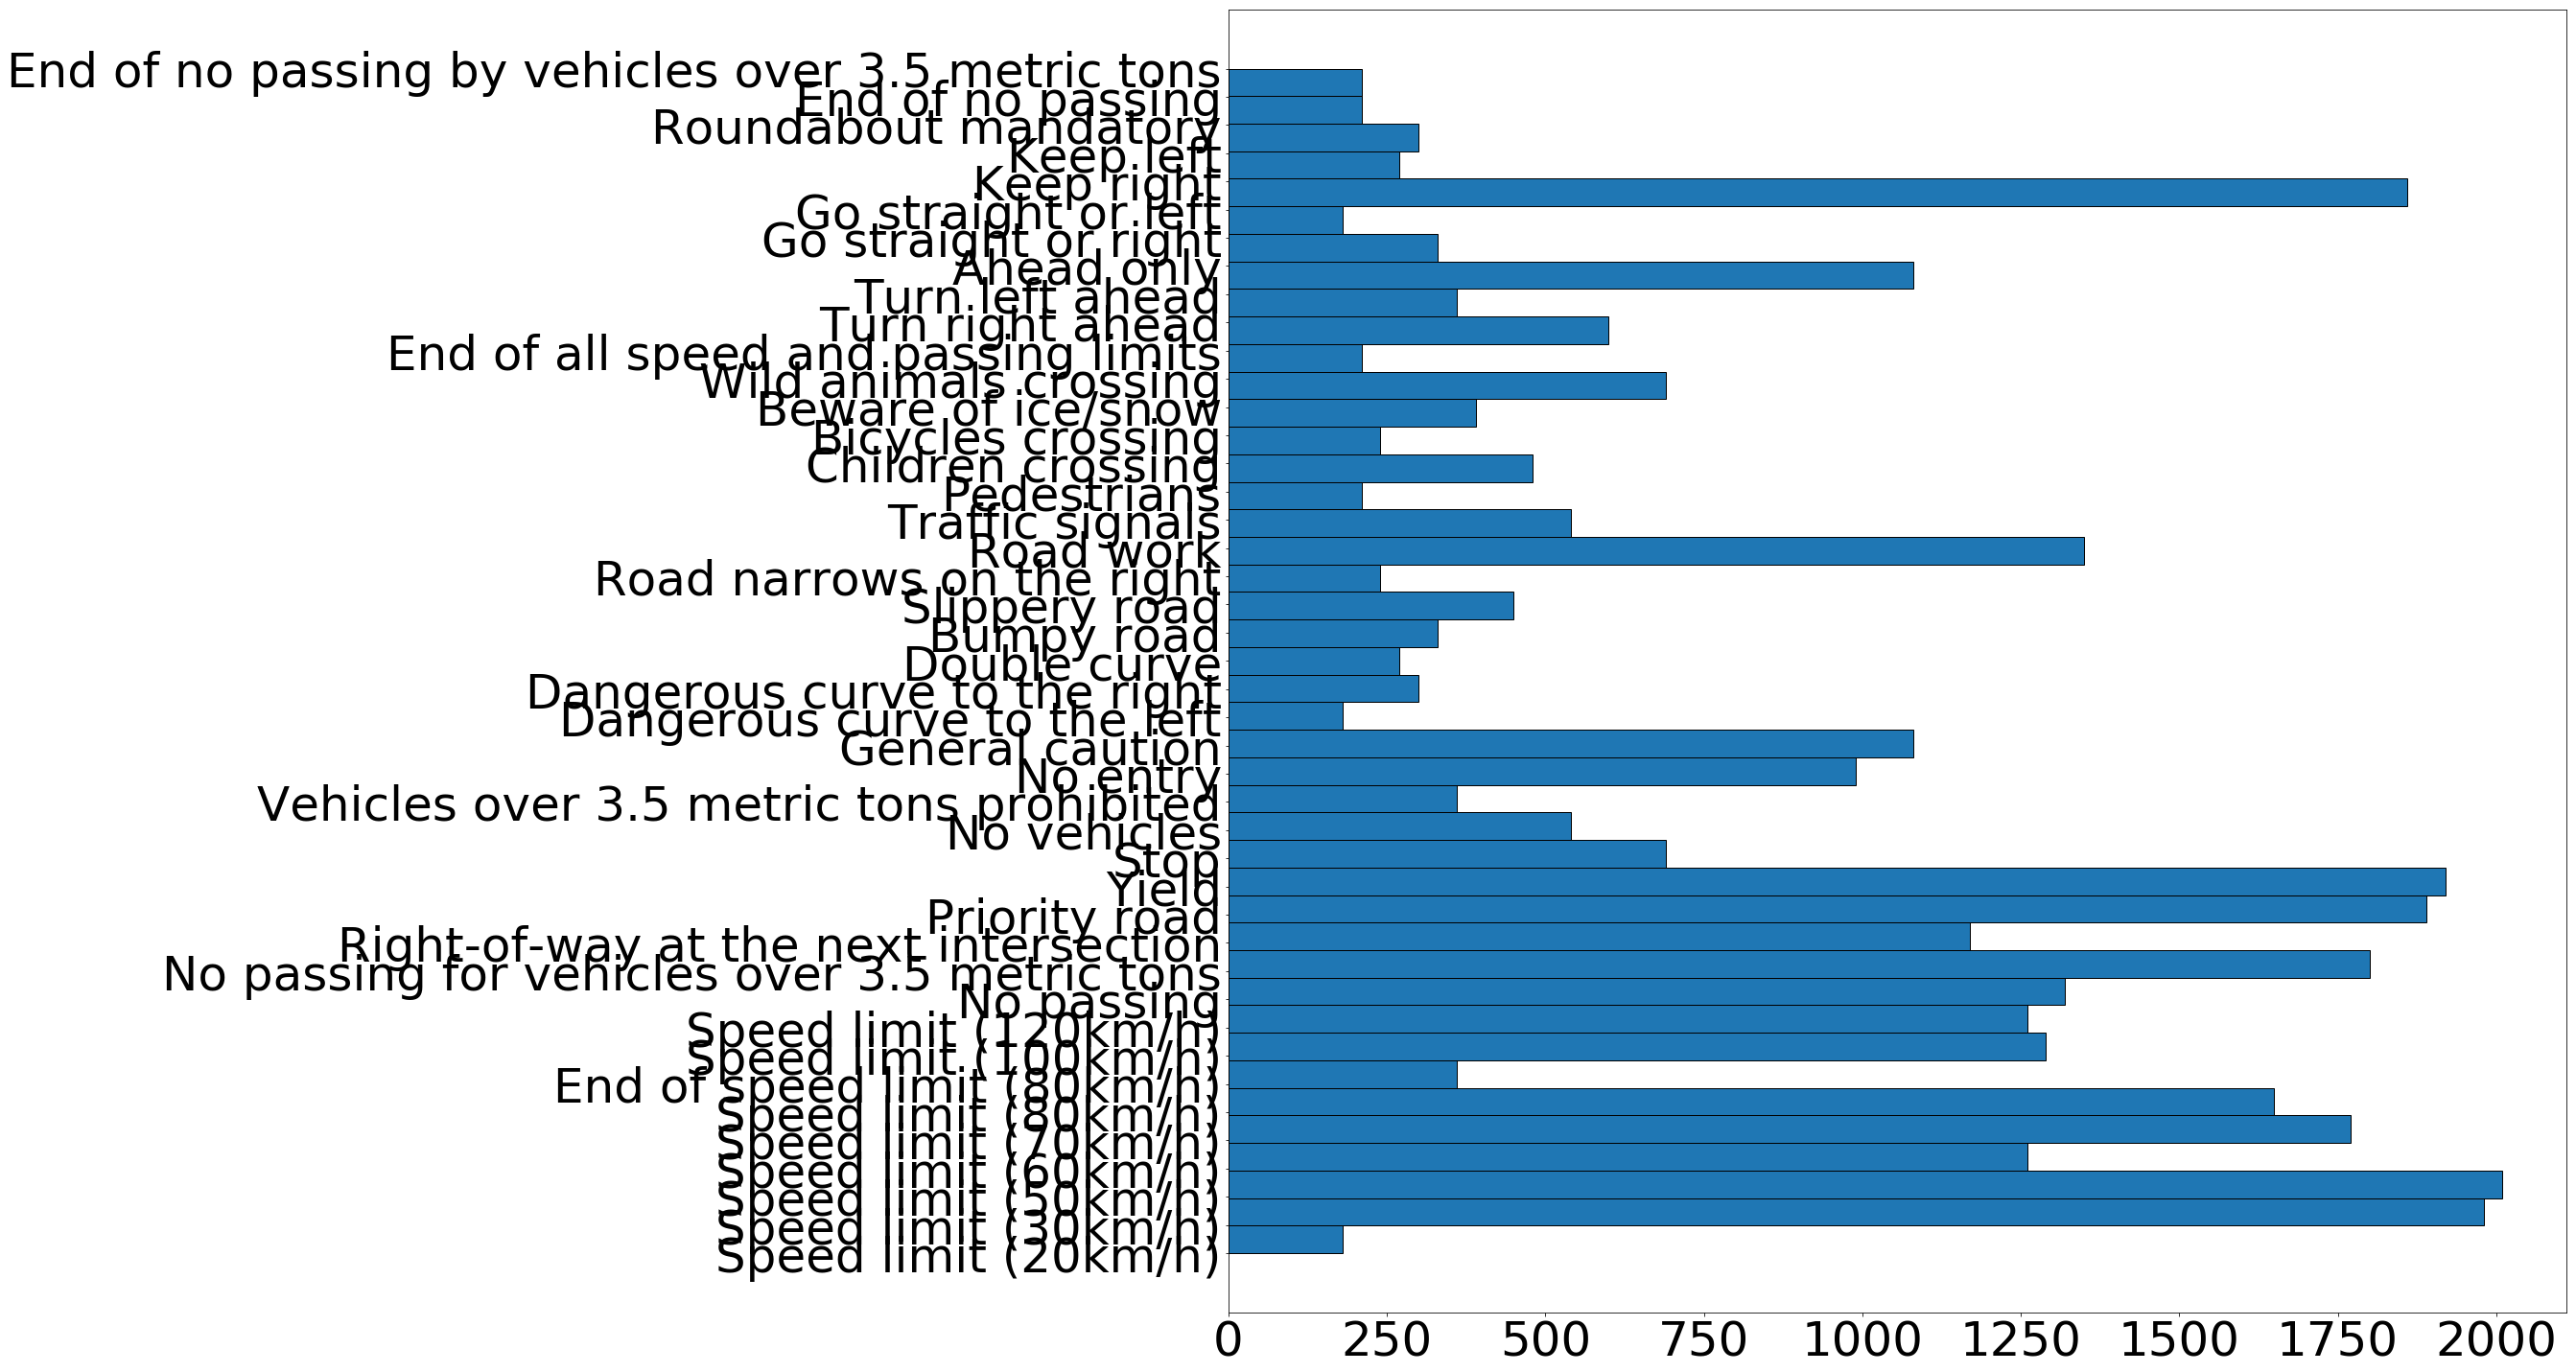

In [47]:
## Explorting labels it the dataset
plt.rcParams.update({'font.size': 50})
f = plt.figure(figsize=(25,25))
f.yticks = plt.yticks(list(range(0,43)),meta_classes["SignName"].values)
ax = f.add_subplot(111)
ax.hist(y_train,ec='k',bins=43,orientation='horizontal');
plt.savefig('readmeFig/label_frequency.jpg')
# ax.show()

In [55]:
import cv2
import numpy as np
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,1] for image in X_train])
X_train =(X_train.astype(np.float32)-255)/255
X_valid = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,1] for image in X_valid])
X_valid =(X_valid.astype(np.float32)-255)/255
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2HLS)[:,:,1] for image in X_test])
X_test =(X_test.astype(np.float32)-255)/255

In [56]:
## Expanding the dim for the batch_size dim 
X_train = np.expand_dims(X_train,axis=3)
X_valid = np.expand_dims(X_valid,axis=3)
X_test = np.expand_dims(X_test,axis=3)

In [57]:
X_train.shape,X_valid.shape,X_test.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

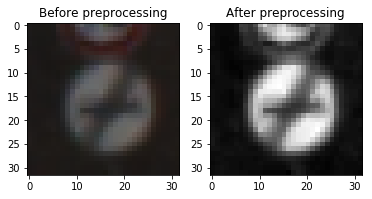

In [59]:
## Checking the image so get an idea whether my preprocess worked properly.
plt.subplot(1,2,1)
plt.title('Before preprocessing')
plt.imshow(temp)
plt.subplot(1,2,2)
plt.imshow(X_train[0].reshape(32,32),cmap='gray')
plt.title('After preprocessing')
plt.savefig('readmeFig/preprocess.jpg')




### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x,keep_prob=0.5):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
#     mu = 0
#     sigma = 0.1
    ## Defining weights
    initializer = tf.contrib.layers.xavier_initializer()
    weights = {
        'wc1': tf.Variable(initializer([5,5,1,6])),
        'wc2':tf.Variable(initializer([5,5,18,18*2])),
        'wd1':tf.Variable(initializer([5*5*108,216])),
        'wd2':tf.Variable(initializer([216,84])),
        'out':tf.Variable(initializer([84,n_classes]))
        
}
    biases = {
        'bc1' :tf.Variable(tf.zeros(6)),
        'bc2' : tf.Variable(tf.zeros(36)),
        'bd1': tf.Variable(tf.zeros(216)),
        'bd2': tf.Variable(tf.zeros(84)),
        'out': tf.Variable(tf.zeros(n_classes))
    }
    

    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x18.
    conv1 = tf.add(tf.nn.conv2d(x,weights['wc1'],strides = [1,1,1,1],padding='VALID'),biases['bc1'])
    conv10 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')
    conv11 = tf.nn.max_pool(conv10,ksize=[1,5,5,1],strides=[1,1,1,1],padding='SAME')
    res_block0 = tf.concat([conv1,conv10,conv11],axis = 3)
#     print(res_block0.shape)
    
    conv1 = tf.layers.batch_normalization(res_block0)
    
    

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x18. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    

    # TODO: Layer 2: Convolutional. Output = 10x10x10.
    conv2 = tf.add(tf.nn.conv2d(conv1,weights['wc2'],strides = [1,1,1,1],padding='VALID'),biases['bc2'])
    conv20 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')
    conv21 = tf.nn.max_pool(conv20,ksize=[1,5,5,1],strides=[1,1,1,1],padding='SAME')
    res_block1 = tf.concat([conv2,conv20,conv21],axis = 3)
#     print(sam.shape)
    
    
    
    conv2 = tf.layers.batch_normalization(res_block1)
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,5,5,1],strides=[1,2,2,1],padding='SAME')
#     print(conv2.shape)
    

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(conv2,(-1,weights['wd1'].get_shape().as_list()[0]))
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1,weights['wd2']),biases['bd2'])
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2,weights['out']),biases['out'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
## HYPER PARAMETER
learning_rate = 0.001
n_batches = 256
epochs = 100

In [13]:
from tqdm import tqdm_notebook as tqdm
from sklearn.utils import shuffle
# shuffle()
import time

In [109]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32,[None,*X_train.shape[1:]])
y = tf.placeholder(tf.int32, [None])
one_hot_y = tf.one_hot(y,n_classes)
logits = LeNet(x)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)\
.minimize(cost)

## Accuracy 
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# Add ops to save and restore all the variables.


# Initializing the variable
init = tf.global_variables_initializer()
test_loss = []
saver = tf.train.Saver()

In [13]:

## Run the graph 
with tf.Session() as sess:
    sess.run(init)
    best_Valid_acc = float('-inf')
    for epoch in range(epochs):
        batch = 0
        X_train,y_train = shuffle(X_train,y_train)
        X_valid,y_valid = shuffle(X_valid,y_valid)
        
        for bs in range(0,X_train.shape[0],n_batches):
            batch+=1
            batch_x = X_train[bs:bs+n_batches]
            batch_y = y_train[bs:bs+n_batches]
#             print()
            sess.run(optimizer, feed_dict={
                x:batch_x,
                y:batch_y
            })
            # Calculate batch loss and accuracy
            loss= sess.run(cost,feed_dict={
                x:batch_x,
                y:batch_y
            })
            test_loss.append(loss)
            train_acc =  sess.run(accuracy,feed_dict={
                x:batch_x,
                y:batch_y
            })
            valb_x = X_valid[:256]
            valb_y = y_valid[:256]
            valid_acc = sess.run(accuracy, feed_dict={
                x:valb_x,
                y:valb_y
            })
            if valid_acc > best_Valid_acc:
                save_path = saver.save(sess, "./saved_weight2/model.ckpt")
#                 print("Model saved in path: %s\n" % save_path)
                best_Valid_acc = valid_acc
            

            print(f'Epoch {epoch+1}, Batch {batch} - Loss: {loss} Train Accuracy: {train_acc} Validation Accuracy: {valid_acc}', end = "\r")

In [14]:
## HYPER PARAMETER - Fine tunning
learning_rate = 0.00001
n_batches = 512
epochs = 10

In [24]:
## Run the graph 
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,*X_train.shape[1:]])
y = tf.placeholder(tf.int32, [None])
keep_prob =tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,n_classes)
logits = LeNet(x,keep_prob)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)\
.minimize(cost)

## Accuracy 
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))



saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    best_Valid_acc = float('-inf')
    for epoch in range(epochs):
        batch = 0
        X_train,y_train = shuffle(X_train,y_train)
        X_valid,y_valid = shuffle(X_valid,y_valid)
        
        for bs in range(0,X_train.shape[0],n_batches):
            batch+=1
            batch_x = X_train[bs:bs+n_batches]
            batch_y = y_train[bs:bs+n_batches]
#             print()
            sess.run(optimizer, feed_dict={
                x:batch_x,
                y:batch_y,
                keep_prob:0.5
            })
            # Calculate batch loss and accuracy
            loss= sess.run(cost,feed_dict={
                x:batch_x,
                y:batch_y,
                keep_prob:0.5
            })
            train_acc =  sess.run(accuracy,feed_dict={
                x:batch_x,
                y:batch_y,
                keep_prob:0.5
            })
            valb_x = X_valid
            valb_y = y_valid
            valid_acc = sess.run(accuracy, feed_dict={
                x:valb_x,
                y:valb_y,
                keep_prob:1.0
            })
            if valid_acc > best_Valid_acc:
                save_path = saver.save(sess, "./saved_weight1/model.ckpt")
#                 print("Model saved in path: %s\n" % save_path)
                best_Valid_acc = valid_acc

        print(f'Epoch {epoch+1} - Loss: {loss} Train Accuracy: {train_acc} Validation Accuracy: {valid_acc}',)

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Epoch 1 - Loss: 0.009870276786386967 Train Accuracy: 0.9959596395492554 Validation Accuracy: 0.9718823432922363
Epoch 2 - Loss: 0.015192237682640553 Train Accuracy: 0.9979798793792725 Validation Accuracy: 0.9718823432922363
Epoch 3 - Loss: 0.02796352468430996 Train Accuracy: 0.9959596991539001 Validation Accuracy: 0.9718823432922363
Epoch 4 - Loss: 0.003474640427157283 Train Accuracy: 0.9979798793792725 Validation Accuracy: 0.9718823432922363
Epoch 5 - Loss: 0.0004451045242603868 Train Accuracy: 1.0000001192092896 Validation Accuracy: 0.9718823432922363
Epoch 6 - Loss: 0.006437093485146761 Train Accuracy: 0.9959596395492554 Validation Accuracy: 0.9718824028968811
Epoch 7 - Loss: 0.005875973030924797 Train Accuracy: 1.0000001192092896 Validation Accuracy: 0.9718823432922363
Epoch 8 - Loss: 0.009685283526778221 Train Accuracy: 0.9979798793792725 Validation Accuracy: 0.9718823432922363
Epoch 9 - Loss: 0.0

## Checking the Test accuracy


In [82]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,*X_train.shape[1:]])
y = tf.placeholder(tf.int32, [None])
keep_prob =tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,n_classes)
logits = LeNet(x,keep_prob)
probs = tf.nn.softmax(logits)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=one_hot_y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)\
.minimize(cost)

## Accuracy 
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    test_x = X_test
    test_y = y_test
    probability = sess.run(probs, feed_dict={x:test_x,keep_prob:1.0})
    test_acc = sess.run(accuracy, feed_dict={
        x:test_x,
        y:test_y,
        keep_prob:1.0
    })
    
print(f"Test accuracy : {test_acc}")

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Test accuracy : 0.9468725323677063


In [93]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(probability_mapped,y_test)
cm =array
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm


array([[ 0.98305085,  0.01694915,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00139276,  0.98467967,  0.00696379, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00262812,  0.97109067, ...,  0.00131406,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.03389831,  0.        , ...,  0.54237288,
         0.        ,  0.03389831],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.94382022]])

In [83]:
probability_mapped = list(map(np.argmax,probability))

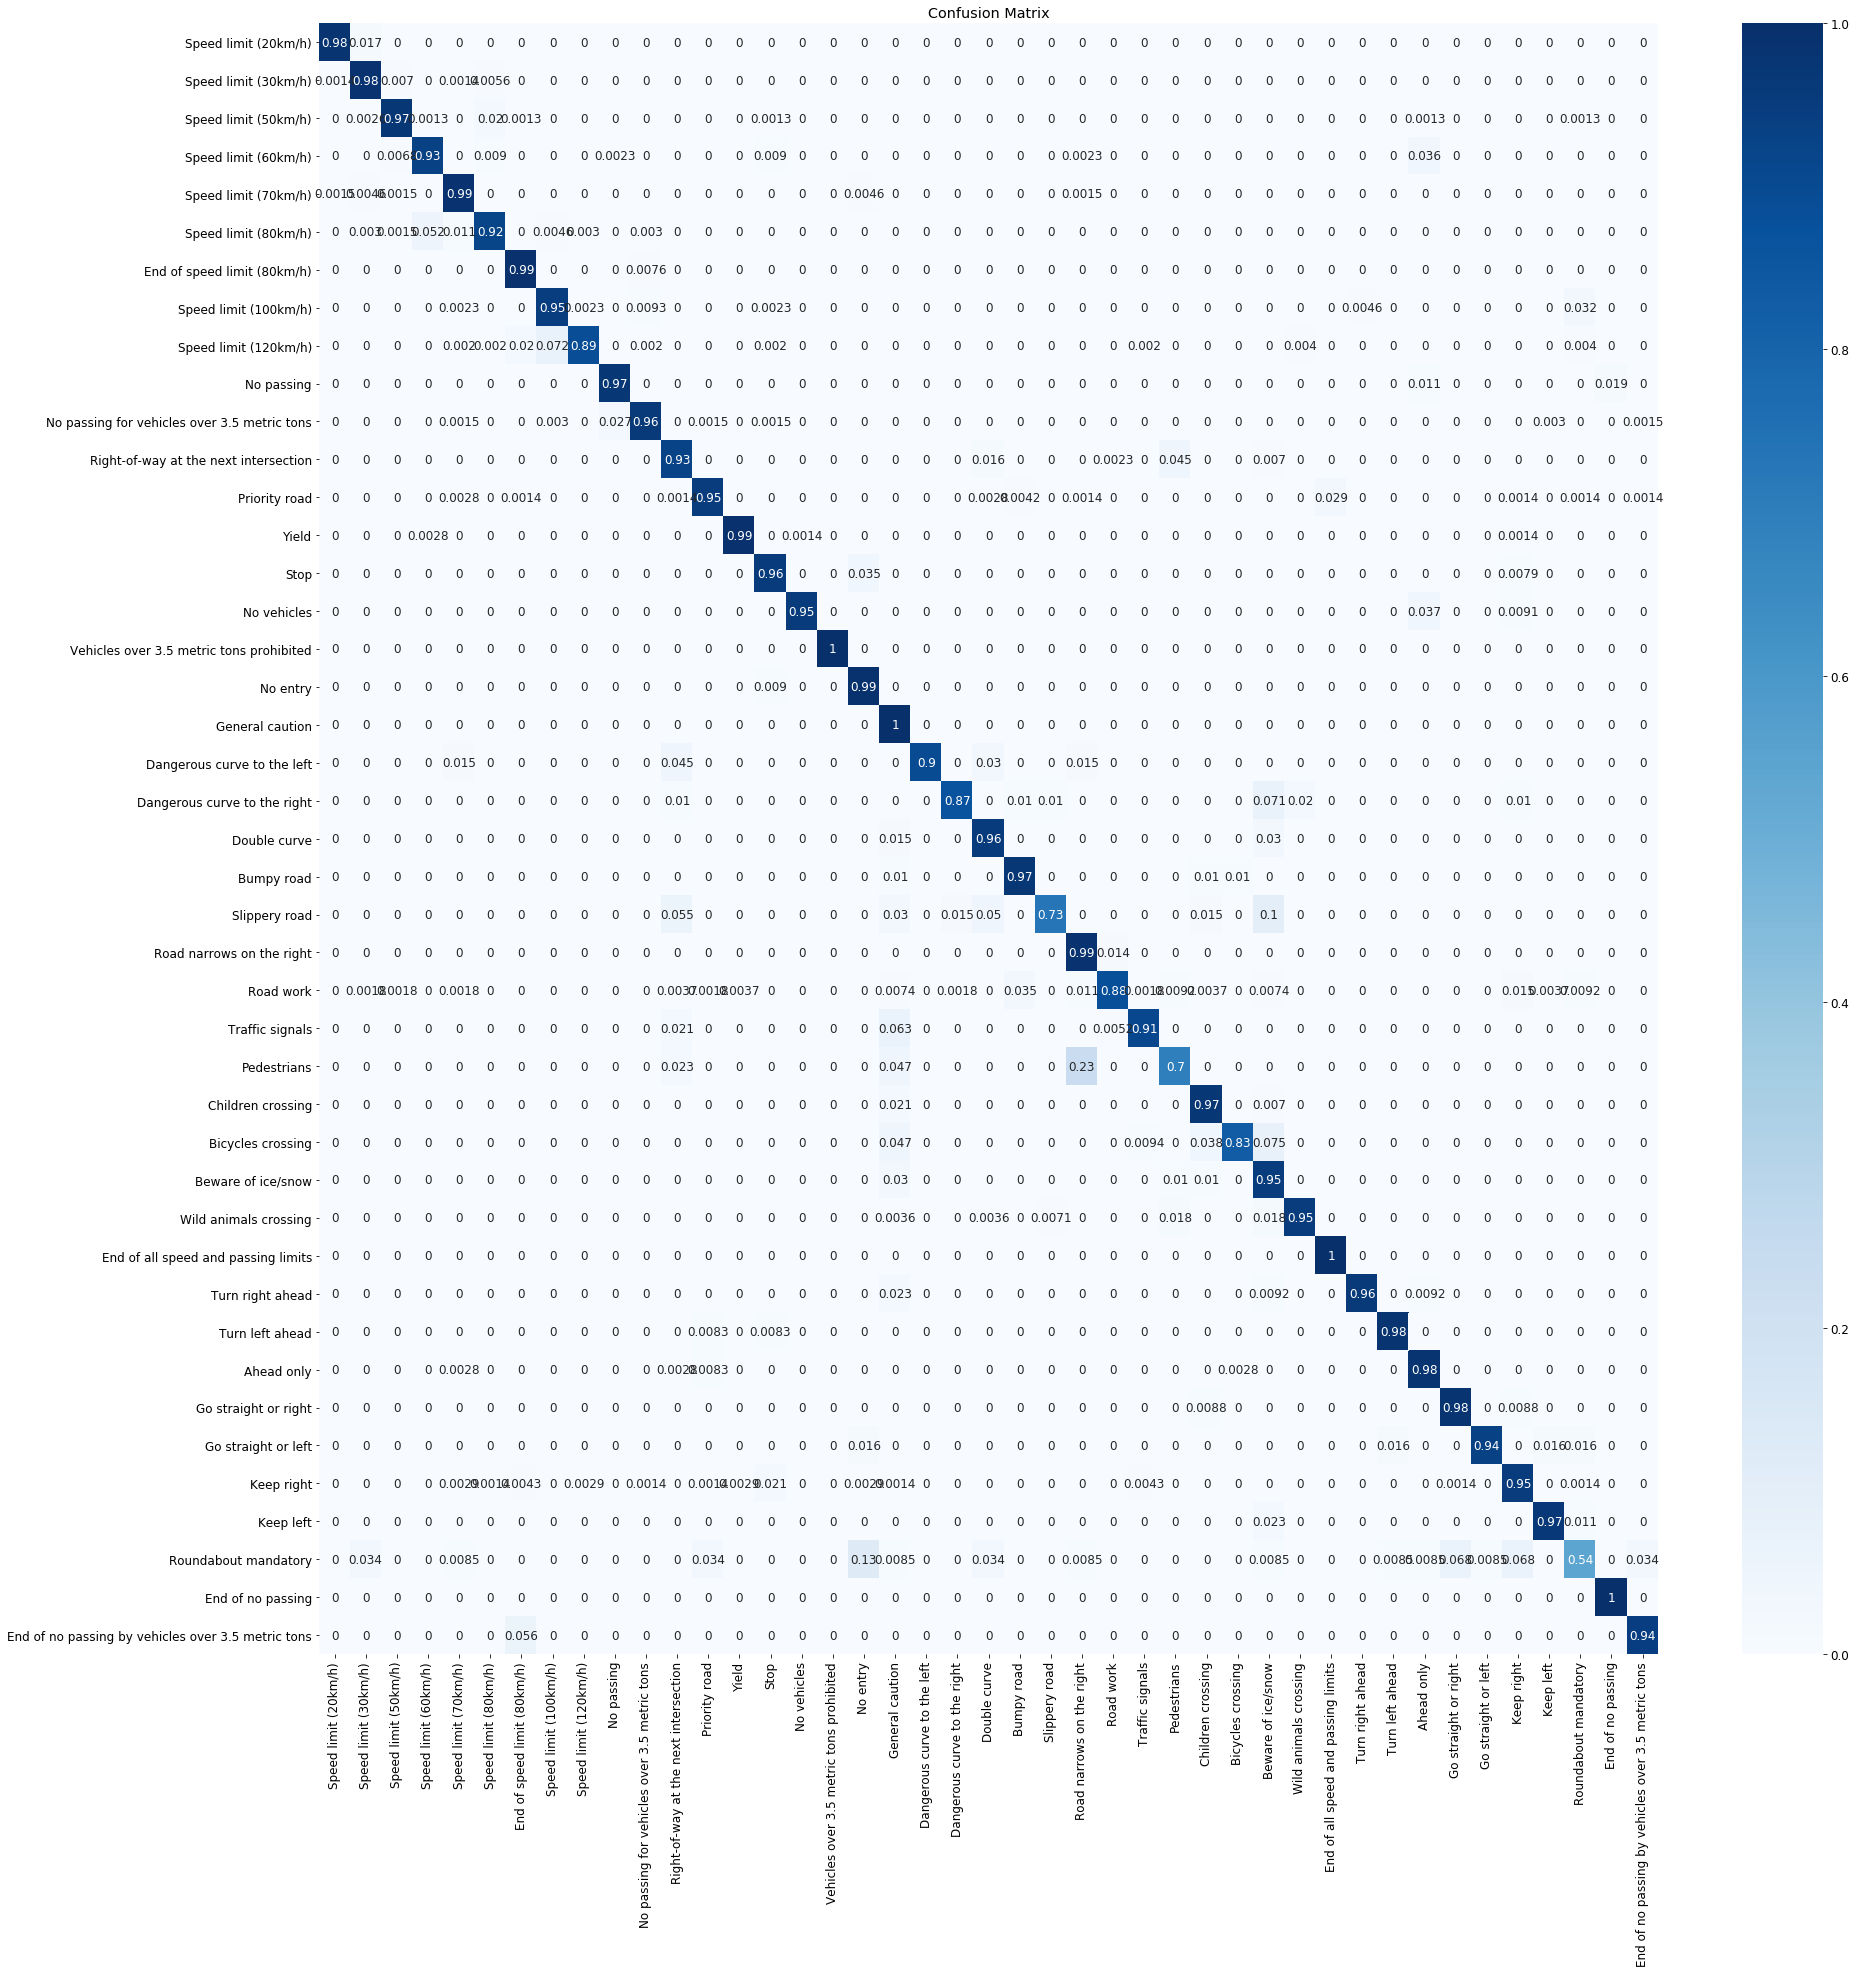

In [108]:
import seaborn as sn
import pandas as pd
plt.rcParams.update({'font.size': 12})
df_cm = pd.DataFrame(cm, index = [i for i in meta_classes["SignName"].values],
                  columns = [i for i in meta_classes["SignName"].values])
plt.figure(figsize = (30,30))
sn.heatmap(df_cm, annot=True,cmap='Blues')
plt.title("Confusion Matrix");
plt.savefig('readmeFig/confusion_matrix.jpg')


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [14]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    img = img[:,:,1]
    img = cv2.resize(img,(32,32),cv2.INTER_AREA)
    img = (img.astype(np.float32)-255)/255
    return img

print(X_train.shape)


(34799, 32, 32, 1)


In [110]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,*X_train.shape[1:]])
y = tf.placeholder(tf.int32, [None])
one_hot_y = tf.one_hot(y,n_classes)
logits = LeNet(x,keep_prob=1.0)
probs = tf.nn.softmax(logits)
saver = tf.train.Saver()

In [111]:
import pandas as pd
meta_classes = pd.read_csv("signnames.csv")
meta_classes.head()


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.


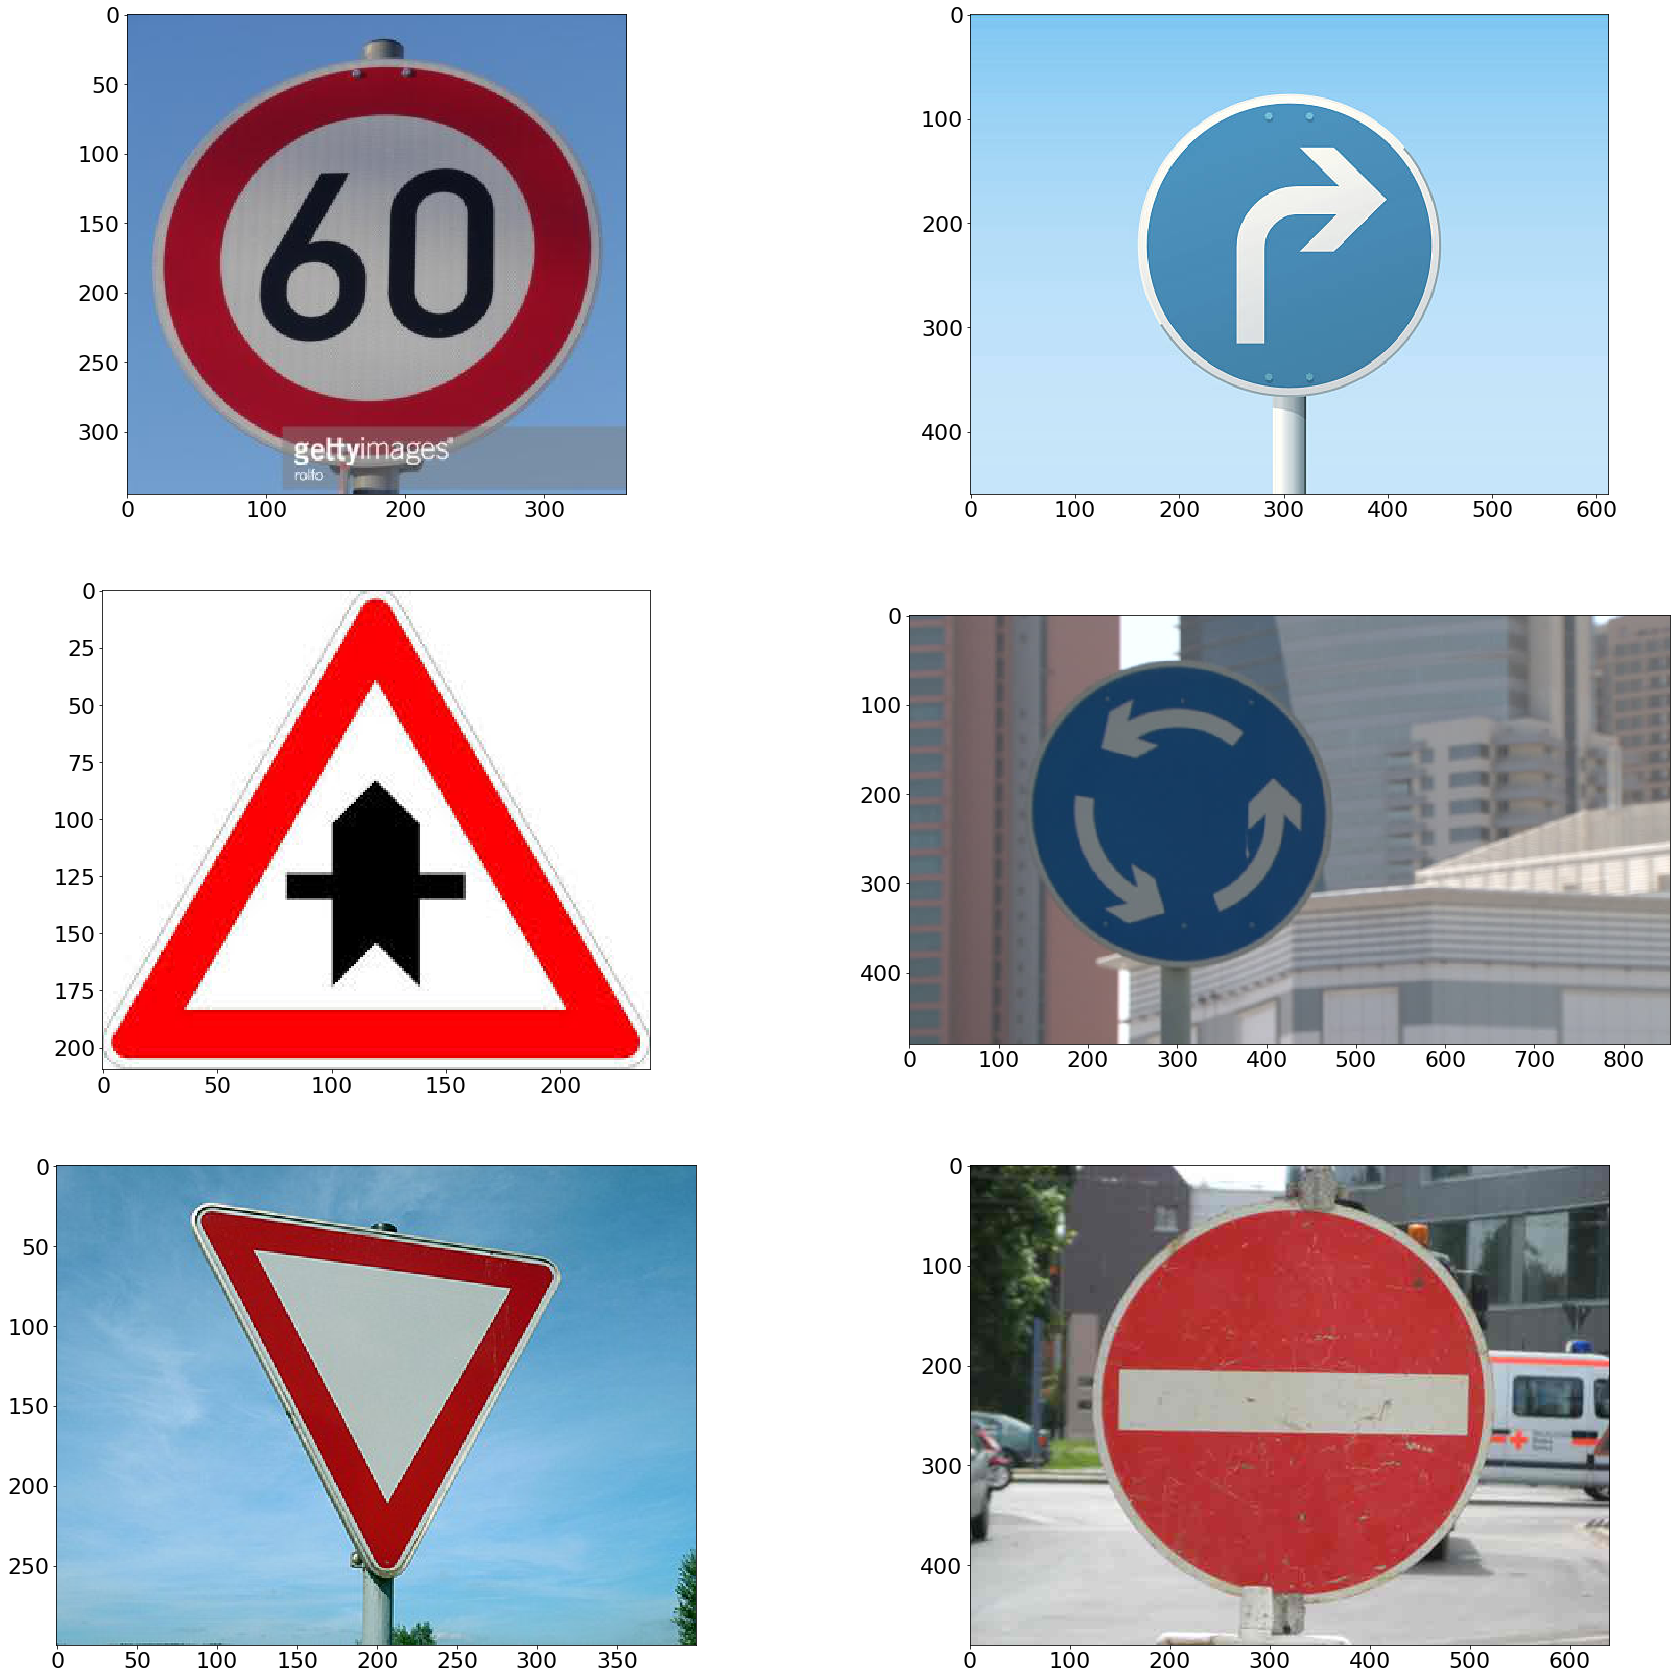

In [112]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import glob
image = glob.glob("test_example/*")


# f = plt.figure(figsize=(30,30))
# for index,fname in enumerate(images):
#     ax = f.add_subplot(4,2,index+1)
#     img = plt.imread(fname)
#     ax.imshow(img)

plt.rcParams.update({'font.size': 22})
with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    f = plt.figure(figsize=(30,30))
    for i,fname in enumerate(image):
        img = mpimg.imread(fname)
#         img = preprocess(img)
#         plt.subplot(3,2,i+1)
        ax = f.add_subplot(3,2,i+1)
        ax.imshow(img)
#         img = np.expand_dims(img,axis=2)
#         img = np.expand_dims(img,axis=0)
#         l=sess.run(probs, feed_dict={x:img})
#         temp = np.argmax(l[0])
#         title = meta_classes[meta_classes["ClassId"]==temp][["SignName"]].iloc[0,0]
#         ax.title = plt.title(title,)
    

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.


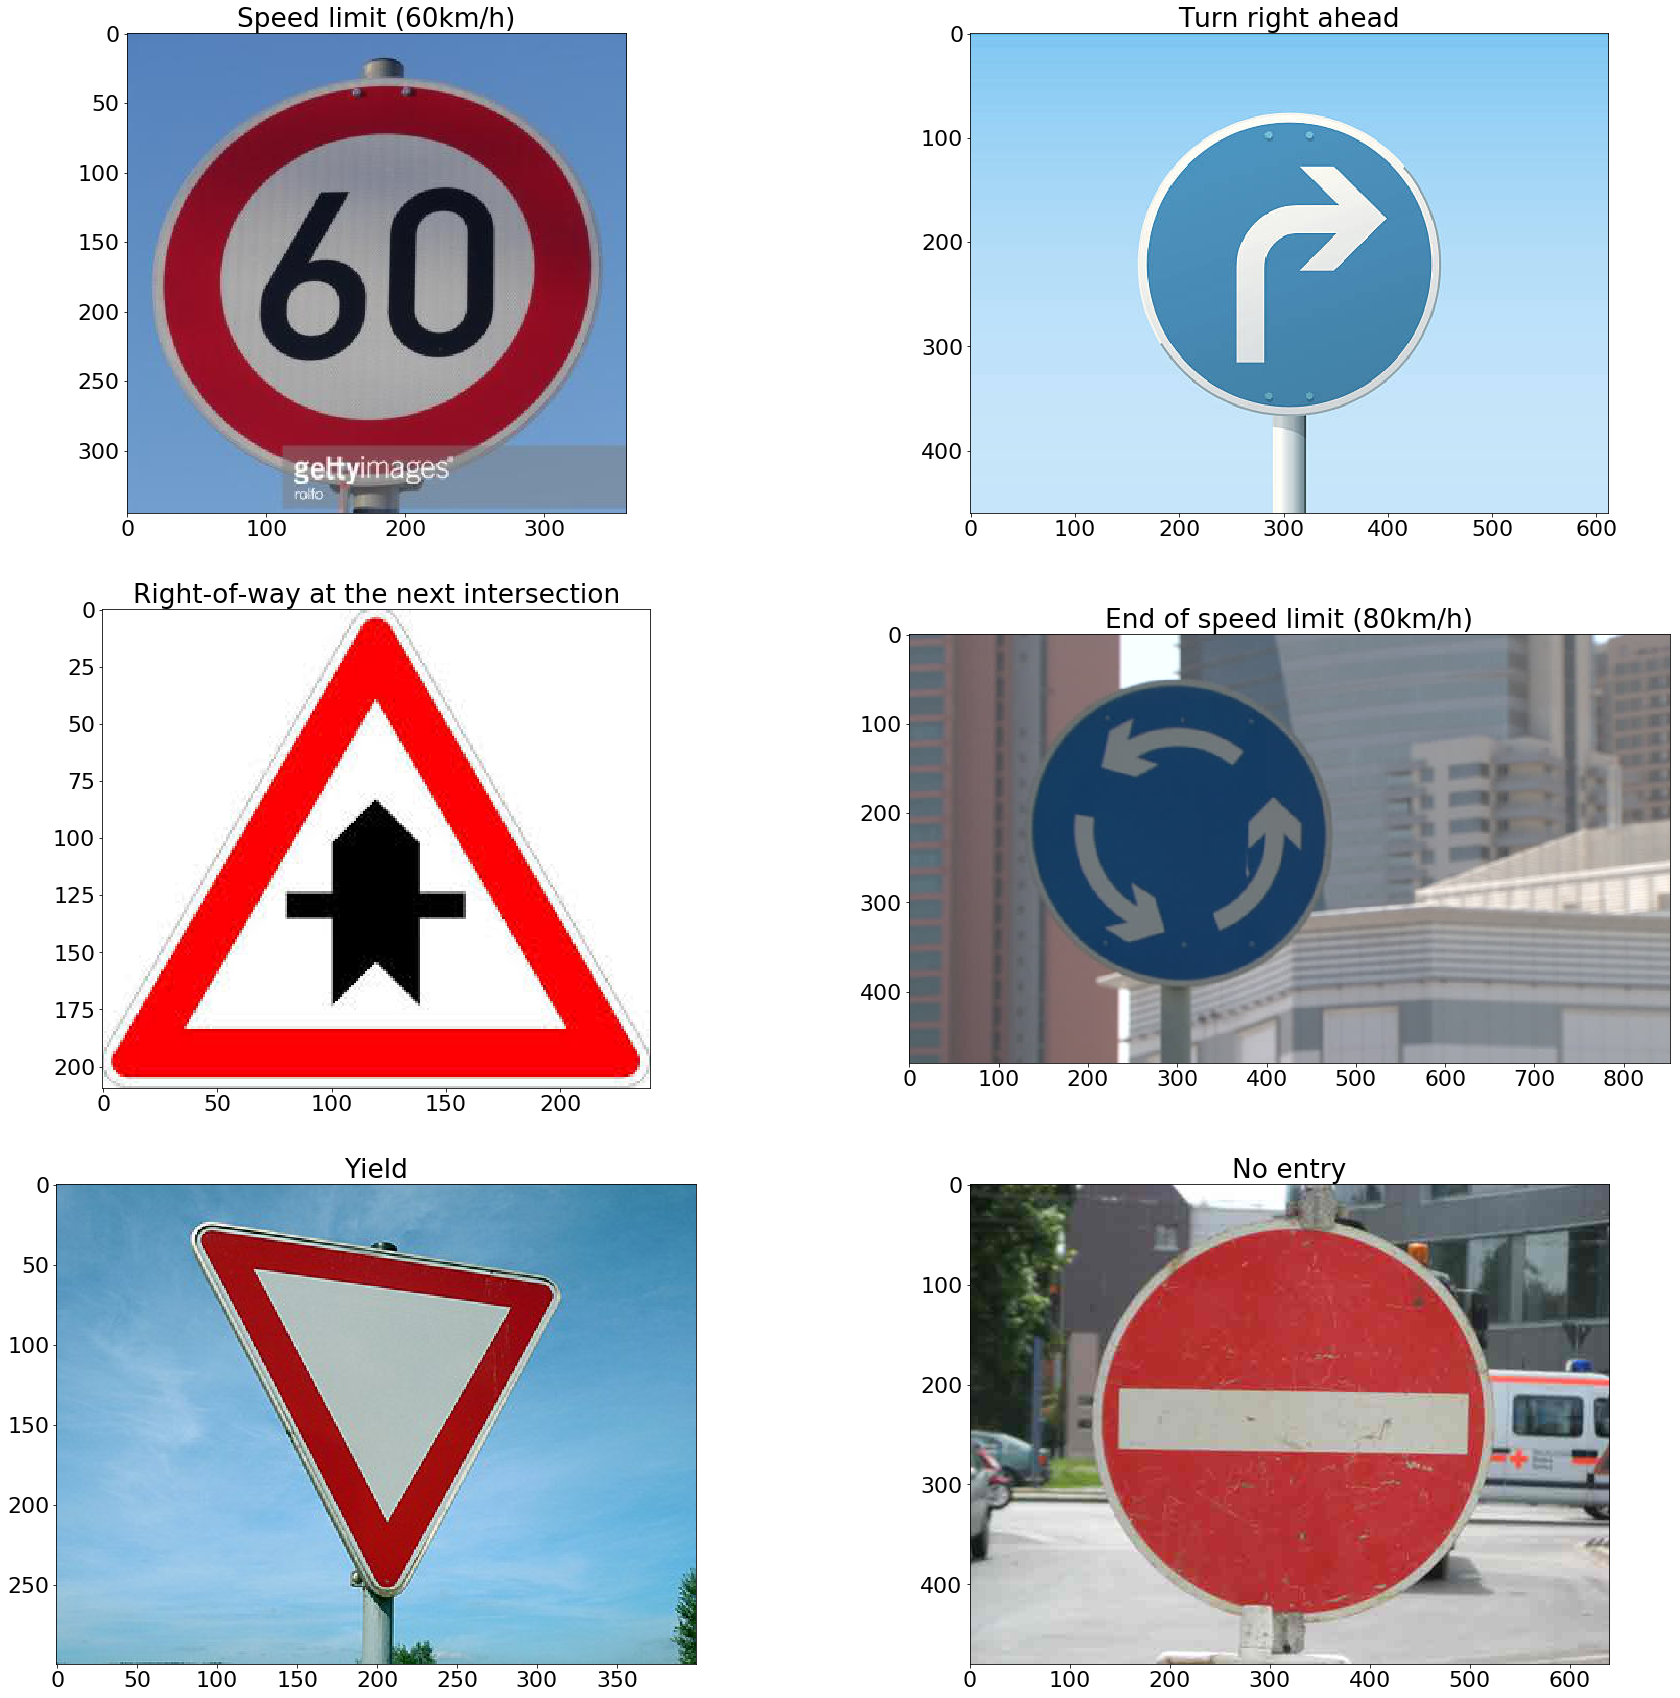

In [113]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
plt.rcParams.update({'font.size': 22})
with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    f = plt.figure(figsize=(30,30))
    for i,fname in enumerate(image):
        img1 = mpimg.imread(fname)
        img = preprocess(img1)
#         plt.subplot(3,2,i+1)
        ax = f.add_subplot(3,2,i+1)
        ax.imshow(img1)
        img = np.expand_dims(img,axis=2)
        img = np.expand_dims(img,axis=0)
        l=sess.run(probs, feed_dict={x:img})
        temp = np.argmax(l[0])
        title = meta_classes[meta_classes["ClassId"]==temp][["SignName"]].iloc[0,0]
        ax.title = plt.title(title,)

plt.savefig('readmeFig/new_image_pred.jpg')    


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("From above the accuracy of my model is {:.3f}%".format((5/6)*100))

From above the accuracy of my model is 83.333%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 0.7151346206665039 label : Speed limit (60km/h) ', ' Prob: 0.28464895486831665 label : Speed limit (50km/h) ', ' Prob: 7.97434986452572e-05 label : Speed limit (80km/h) ', ' Prob: 6.560359906870872e-05 label : Speed limit (30km/h) ', ' Prob: 3.188087066519074e-05 label : Children crossing ']


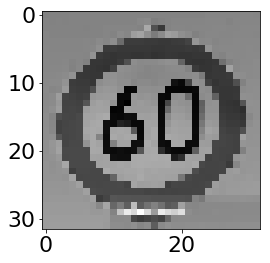

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
image = iter(glob.glob("test_example/*"))
img1 = next(image)

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)
    


INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 1.0 label : No entry ', ' Prob: 2.405853519140774e-19 label : Stop ', ' Prob: 9.976663779315871e-27 label : Turn right ahead ', ' Prob: 1.4548312299562122e-29 label : No passing ', ' Prob: 3.4848694504217997e-33 label : Turn left ahead ']


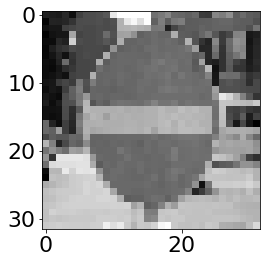

In [27]:
img1 = next(image)

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)
    


INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 0.9999649524688721 label : Turn right ahead ', ' Prob: 2.8744656447088346e-05 label : Ahead only ', ' Prob: 3.5301156913192244e-06 label : Speed limit (80km/h) ', ' Prob: 2.632082669151714e-06 label : Speed limit (60km/h) ', ' Prob: 6.236638938617034e-08 label : Road work ']


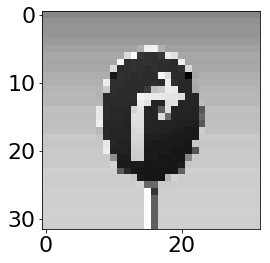

In [21]:
img1 = next(image)

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)
    


INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 1.0 label : Right-of-way at the next intersection ', ' Prob: 2.4649293717260434e-10 label : Beware of ice/snow ', ' Prob: 4.2747701212153544e-11 label : Priority road ', ' Prob: 8.800827362882846e-13 label : Roundabout mandatory ', ' Prob: 2.4748557303054684e-21 label : Slippery road ']


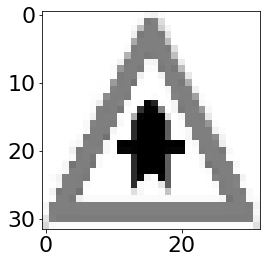

In [22]:
img1 = next(image)

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)
    


INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 0.6498083472251892 label : End of speed limit (80km/h) ', ' Prob: 0.18411892652511597 label : Dangerous curve to the right ', ' Prob: 0.05767056718468666 label : Road work ', ' Prob: 0.051564350724220276 label : Keep right ', ' Prob: 0.04205500707030296 label : Roundabout mandatory ']


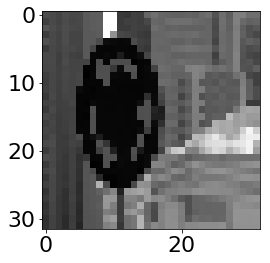

In [23]:
img1 = next(image)

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)
    


INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 1.0 label : Yield ', ' Prob: 1.8411257034029732e-17 label : No vehicles ', ' Prob: 7.020509333405998e-18 label : Keep right ', ' Prob: 3.548385624990162e-19 label : Turn left ahead ', ' Prob: 4.876345578889857e-23 label : Right-of-way at the next intersection ']


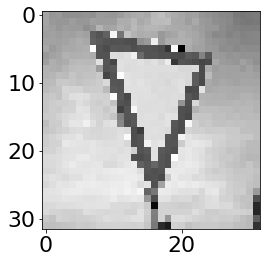

In [24]:
img1 = next(image)

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)
    

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 0.9999464750289917 label : Stop ', ' Prob: 5.353419328457676e-05 label : Speed limit (60km/h) ', ' Prob: 3.909121915057767e-09 label : Speed limit (50km/h) ', ' Prob: 6.13147607773229e-13 label : Keep right ', ' Prob: 1.1497608962997286e-13 label : No passing ']


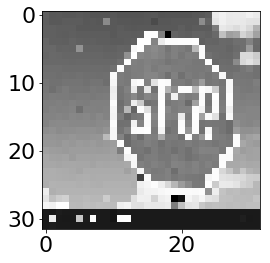

In [25]:
img1 = "stop.jpg"

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt
Model restored.
Top 5 Prediction: 

[' Prob: 0.9998505115509033 label : Priority road ', ' Prob: 9.499909356236458e-05 label : Keep right ', ' Prob: 5.083790892967954e-05 label : End of no passing by vehicles over 3.5 metric tons ', ' Prob: 2.876775852200808e-06 label : End of no passing ', ' Prob: 4.382058307328407e-07 label : No passing for vehicles over 3.5 metric tons ']
HERE MODEL IS MAKING MISTAKE!!


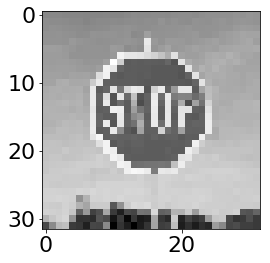

In [26]:
img1 = "stop2.jpeg"

with tf.Session() as sess:
    saver.restore(sess, "./saved_weight1/model.ckpt")
    print("Model restored.")
    img = mpimg.imread(img1)
    img = preprocess(img)
#         plt.subplot(3,2,i+1)
    plt.imshow(img,cmap='gray')
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    out=sess.run(probs, feed_dict={x:img})
    temp = sess.run(tf.nn.top_k(out,k=5,sorted=True))
    print("Top 5 Prediction: \n")
    temp.values
    out = [(f""" Prob: {val} label : {meta_classes[meta_classes["ClassId"]== index ][["SignName"]].iloc[0,0]} """ ) for val,index in zip(temp.values[0],temp.indices[0])]
    print(out)
    print("HERE MODEL IS MAKING MISTAKE!!")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [115]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
#     image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x:image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    nrow = 8
    ncol = featuremaps//8 + (featuremaps) 
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt


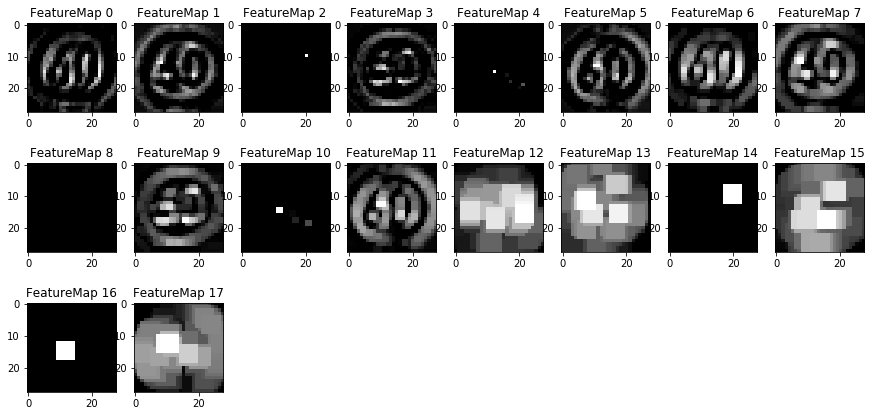

In [116]:
plt.rcParams.update({'font.size': 10})
with tf.Session() as sess:
#     tf.reset_default_graph()
    saver.restore(sess, "./saved_weight1/model.ckpt")
    tf_activation = sess.graph.get_tensor_by_name('Relu:0')
    im = mpimg.imread('test_example/60.jpg')
    img = preprocess(im)
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    outputFeatureMap(img,tf_activation)
    plt.savefig('readmeFig/res1.jpg')

In [117]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
#     image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x:image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    nrow = 8+1
    ncol = featuremaps//8 
    for featuremap in range(featuremaps):
        plt.subplot(ncol,nrow, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./saved_weight1/model.ckpt


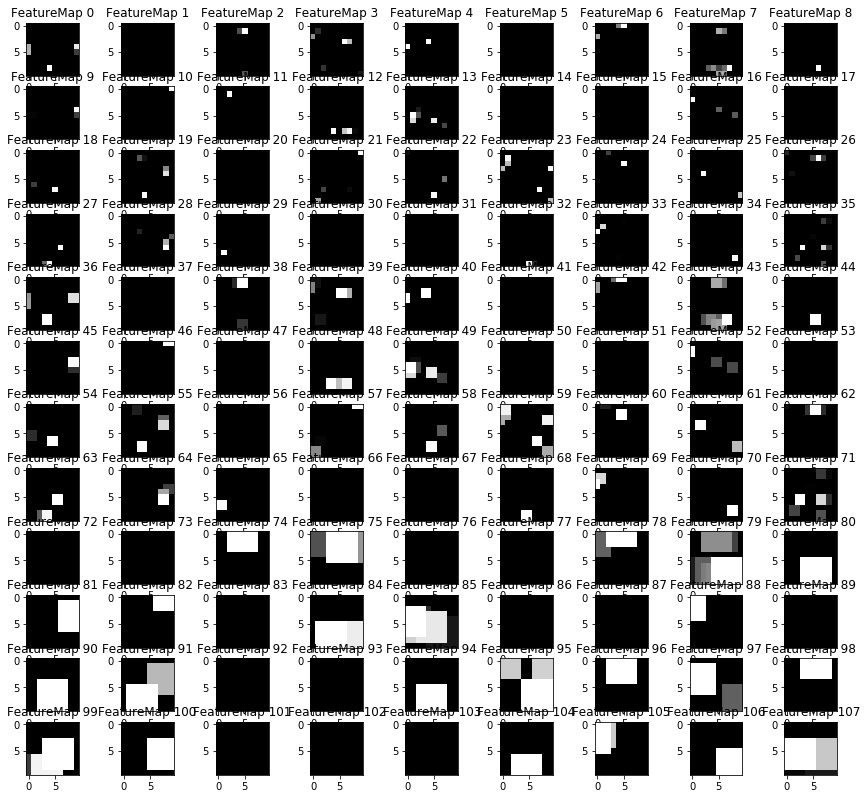

In [118]:
plt.rcParams.update({'font.size': 10})
with tf.Session() as sess:
#     tf.reset_default_graph()
    saver.restore(sess, "./saved_weight1/model.ckpt")
    tf_activation = sess.graph.get_tensor_by_name('Relu_1:0')
    im = mpimg.imread('test_example/60.jpg')
    img = preprocess(im)
    img = np.expand_dims(img,axis=2)
    img = np.expand_dims(img,axis=0)
    outputFeatureMap(img,tf_activation)
    plt.savefig('readmeFig/res2.jpg')

In [ ]:
tf.get_default_graph().get_operations();

# Traffic Sign Recognition

### Goals
- Load dataset
- Explore, summarize and visualize the data set
- Design, train and test a model architecture
- Use the model to make predicition on new images
- Analyze the softmax probabilities of the new images
- Summarize the results with a written report


## Data Set Summary 
I used the pandas library to calculate summary statistic of the traffic signs data set:
- The size of training set is: 34799
- The size of the validation set is: 4410
- The size of test set is: 12630
- The shape of a traffic sign image is: (32, 32, 3) 
- The number of unique/labels in the data set: 43 

## Exploratory visualization of the dataset.
- There are 43 different road signs in this dataset, so let's visulaize them
<img src ="readmeFig/allclasses.jpg">

- And in the above dataset we have different frequency for each class and some classes are less sampled as compared to other, so will have difficulties in prediciting them correctly by our model.

<img src = "readmeFig/label_frequency.jpg">


## Design and Test a Model Architecture

### 1. Preprocessing
1. Change the image from RGB TO HSL with help of `img = cv2.cvtColor(img, cv2.COLOR_RGB2HSL)`
2. After that only took the 1 channel as the preprocessed output. `img = img[:,:,1]`
3. Then convert the pixels as float32 and substract 255 for each pixel and divide it by 255 to make it in a range of $[-1,1]$. `img =(img.astype(np.float32)-255)/255`. This is how I have normalized the image dataset.

Here is an example of a traffic sign image befor and after preprocessing is done.
<img src = "readmeFig/preprocess.jpg">

### 2. Model Architecture
| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Normalized Image and preprocessed   							| 
| Convolution 5x5 (conv1) Input: Input    	| 1x1 stride, valid padding, outputs 28x28x6 	|
| MaxPooling 2x2 (conv10) Input: conv1   	| 1x1 stride, same padding, outputs 28x28x6 	|
| MaxPooling 5x5 (conv11) Input: conv10   	| 1x1 stride, same padding, outputs 28x28x6 	|
| Residual Block (res_block0) Input: (conv1,conv10,conv11)   	| tf.concat(\[conv1,conv10,conv11\],axis = 3) outputs 28x28x18 	|
| Batch Normalization (conv1) Input: res_block0					|												momentum=0.99, epsilon=0.001|
| RELU			(conv1)		|				Activation						|
| MaxPooling 5x5	(conv1)      	| 2x2 stride, valid padding outputs 14x14x18 				|
| Convolution 5x5 (conv2) Input: conv1    	| 1x1 stride, valid padding, outputs 10x10x36 	|
| MaxPooling 2x2 (conv20) Input: conv2   	| 1x1 stride, same padding, outputs 10x10x36	|
| MaxPooling 5x5 (conv21) Input: conv20  	| 1x1 stride, same padding, outputs 10x10x36 	|
| Residual Block (res_block1) Input: (conv2,conv20,conv21)   	| tf.concat(\[conv2,conv20,conv21\],axis = 3) outputs 10x10x108 	|
| Batch Normalization (conv2) Input: res_block1					|												momentum=0.99, epsilon=0.001|
| RELU			(conv2)		|				Activation						|
| MaxPooling 5X5	(conv2)      	| 2x2 stride, valid padding outputs 5x5x108 				|
| Flatten	(flatten)      	| 		outputs (batch_size,2700)		|
| Fully connected	(fc1)	| Input:(batch_size,2700) Output:       (batch_size,216)			|
| RELU	(fc1)	|Activation		|
| Fully connected	(fc2)	| Input:(batch_size,216) Output:       (batch_size,84)			|
| RELU	(fc2)	|Activation		|
| DROPOUT	(fc2)	|Regularization keep_prob=0.5		|
| Fully connected	(out)	| Input:(batch_size,84) Output:       (batch_size,n_classes)			|
| Softmax	(out)	|Activation		|

### Model Training description
-  Hyperparameter
```
## HYPER PARAMETER
learning_rate = 0.001
n_batches = 256
epochs = 100
```
- The optimizer used in this implementation is Adam Optimizer.
- After training for 100 epochs he validation accuracy was 92%
- After this I fine tunned the weights with a smaller learning rate.
- And the hyperparameter were as follows
```
learning_rate = 0.00001
n_batches = 512
epochs = 10
```
- After doing finetunning the accuracy were as follows:
    1. Train Accuracy: 0.9979
    2. Validation Accuracy: 0.9718
    3. Test Accuracy: 0.946
    
- The above architecture was inspired by Resnet architecture,
- This was my first model and it worked pretty well.

### Confusion Matrix

<img src = "readmeFig/confusion_matrix.jpg">

- When we analyze this Confusion matrix we see our model does fantastic job with most of the traffic sign and does not do that well on some classes.
- The classes on which it didn't do well are:
    1. Roundabout mandatory with 0.54 accuracy
    2. Pedstrian with 0.7 accuracy
    3. Slippery Road with 0.73 accuracy
    4. Bicycle Crossing with 0.83 accuracy
    
### Test a Model on New Image
1. Choose five German traffic signs found on the web and provide them in the report.
2. As we have seen our model does not do well with Roundabout Mandatory road Sign so I have included that too see how my model perform on that.
3. The title of each image is the predicted label

<img src = "readmeFig/new_image_pred.jpg">

4. So out of 6 images my model predicted 5 of them correctly. And one was incorrectly classified and Roundabout sign was misclassiified.
5. So accuracy of our model on these images are 83.33%


## Visualizing the Neural Network.
#### Visualizing the Residual block 1.
<img src = "readmeFig/res1.jpg">

#### Visualizing the Residual block 2.

<img src = "readmeFig/res2.jpg">


### Future work
- I think to improve the model performance I can work on image augmentation and hope the performance improves.
- Secondly some classes are under sampled and we can collect more images of them.
- And at last we could use transfer learning and utilize the pretrained weights from network like Resnet32 and etc.